# Aerofit - Descriptive Statistics & Probability

**About Aerofit**

   Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Problem Statement**

* To identify the profile of the typical customer for each treadmill product offered by the company.
* To investigate whether there are differences across the product lines with respect to customer characteristics.
* Based on the data, construct two-way contingency tables and compute all conditional and marginal probabilities for each AeroFit treadmill product and generate a set of insights and recommendations that will help the company in targetting new customers.

The dataset (Aerofit_treadmill.csv) contains the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months,  that includes the following features:

* **Product Purchased:**  KP281, KP481, or KP781
* **Age:**	 In years
* **Gender:**	 Male/Female
* **Education:**	 In years
* **MaritalStatus:**	 Single or partnered
* **Usage:**	 The average number of times the customer plans to use the treadmill each week.
* **Income:**	 Annual income (in $)
* **Fitness:**	 Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
* **Miles:**	 The average number of miles the customer expects to walk/run each week

**Product Portfolio:**

* The KP281 is an entry-level treadmill that sells for 1,500 dollars.
* The KP481 is for mid-level runners that sell for 1,750 dollars.
* The KP781 treadmill is having advanced features that sell for 2,500 dollars.



In [1]:
# Importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
df = pd.read_csv('aerofit_treadmill.txt')

Understanding structure of data by head() and tail() to print first and last rows of dataset.

In [3]:
# Analyse first 10 rows
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [4]:
# Analyse last 10 rows
df.tail(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200
172,KP781,34,Male,16,Single,5,5,92131,150
173,KP781,35,Male,16,Partnered,4,5,92131,360
174,KP781,38,Male,18,Partnered,5,5,104581,150
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [5]:
# Examine shape of dataset
df.shape

(180, 9)

The dataset has 180 rows and 9 columns 

In [6]:
# Examine the data types of values in dataset.
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

* Product,Gender, Marital Status are of string datatype
* Age,Education,Usage, Fitness, Income and Miles are of numerical datatype

In [7]:
# to optimise memory we will be changing datatype of Gender, MaritalStatus and Product from Object to Category.
cat = ['Gender', 'MaritalStatus', 'Product']
for x in cat:
    df[x] = df[x].astype("category")
    

In [8]:
# To know the data types of values provided and check if any columns has the missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [9]:
#Check for the null values in dataset
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Observations:** There are no missing values in the dataset

In [10]:
# checking for duplicate values
df.duplicated().sum()

0

Our dataset doesnot contain any duplicate values.

In [11]:
## Statistical analysis of numerical columns in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [12]:
# Descriptive analysis of categorical columns
df.describe(include = "category").T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


**Observations:**

1) Numerical data

* Age of customer using treadmill is between range 18 - 50 . Average age is 28.78 and median is 26.

* Maximum income of treadmill user is 100K , Average income approx. 54K ,while median is is approx. 51K.

* Expected Treadmill usage is atleast once a week , maximum is 7 times a week and on average 3 times a week.

* Customer education is between 12 - 21 years, with average and median of 16 years and maximum of 21 years.

* Customer expects to run on an average of 103.19 miles per week, median 94 miles per week.

* Average self rated fitness is 3.

2) Categorical data

* KP281 is the most sold threadmill model.
* Male customers buys more treadmill units compared to female customers.
* Customers who are partnered are buying treadmill more compared to single customer.

## Non-graphical analysis

In [13]:
# Display the no. of unique values in each column
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [14]:
# Examine the unique values in each column
col_names = ['Product','MaritalStatus','Usage','Fitness','Education','Age']
for x in col_names : 
    print('{} :{} ' . format(x.upper(),df[x].unique()))
    print()
    

PRODUCT :['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781'] 

MARITALSTATUS :['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single'] 

USAGE :[3 2 4 5 6 7] 

FITNESS :[4 3 2 1 5] 

EDUCATION :[14 15 12 13 16 18 20 21] 

AGE :[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42] 



**Observations**

* There are 3 different treadmill models (KP281, KP481 and KP781) in our dataset.
* Age of customers range from 18 to 50.
* Education in years range from 12 to 21 .
* There are both single and patnereded customers.
* Usage ranges from 2 to 7 (days/week).
* Fitness level of customers ranges from 1-5.


In [15]:
# Count based on threadmill model
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

KP281 is the most sold model and KP781 is the least sold model

In [16]:
# Count based on Gender
df["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

Male customers are buying more treadmills compared to female customers

In [17]:
# count based on Marital status of customers
df["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

Partnered customers are buying more treadmills compared to single customers

### Data analysis based on Threadmill models 

**KP281**

In [18]:
df[df['Product'] == 'KP281'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


**Observations:**
    
* A total of 80 customers purchased KP281 model.
* Average age of customer is 28.5  (Median: 26) (Range: 18 - 50). Data is right skewed.
* Average number of years of Education for customers is 15 (Median: 16)
* Customer wants to use the treadmill at least 3 times per week
* Self rated fitness is 3 that is average fitness level
* Customers are expected to run is 82.78 miles per week (Median: 85)
* Average income and median is approximately USD 46,000 .

**KP481**

In [19]:
df[df['Product'] == 'KP481'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.0,26.0,33.25,48.0
Education,60.0,15.116667,1.222552,12.0,14.0,16.0,16.00,18.0
Usage,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.0,3.0,3.00,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.5,49459.5,53439.00,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.0,85.0,106.00,212.0


**Observations:**

* A total of 60 customers purchased KP481 model
* Average age of customer is 28.9 (Median: 26) (Range: 19-48).Data is right skewed.
* Average number of years of Education for customers is 15 (Median: 16)
* Customer wants use the treadmill at least 3 times per week
* Customers are expected to run is 60 miles per week (Median: 85)
* Average income is USD 48,973 (Median: USD 49,459)

**KP781**

In [20]:
df[df['Product'] == 'KP781'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.100,6.971738,22.0,24.75,27.0,30.25,48.0
Education,40.0,17.325,1.639066,14.0,16.00,18.0,18.00,21.0
Usage,40.0,4.775,0.946993,3.0,4.00,5.0,5.00,7.0
Fitness,40.0,4.625,0.667467,3.0,4.00,5.0,5.00,5.0
Income,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.00,104581.0
Miles,40.0,166.900,60.066544,80.0,120.00,160.0,200.00,360.0


**Observations:**

* A total of 40 customers purchased KP781 model
* Average age of customer is 29 (Median: 27) (Range: 22-48)
* Average number of years of Education for customers is 17 (Median: 18)
* Customer wants to use the treadmill at least 4-5 times per week
* Customers are expected to run are 166 miles per week (Median: 160)
* Average income is USD 75,000 (Median: USD 76,000)

## Data Visualisation - Univariate analysis & Bivariate analysis

> **CATEGORICAL FEATURES - Product,Gender,Marital Status**

In [21]:
# Column names of dataframe
print(df.columns.values)

['Product' 'Age' 'Gender' 'Education' 'MaritalStatus' 'Usage' 'Fitness'
 'Income' 'Miles']


In [22]:
# Function to plot countplot and piechart for categorical features.
def categ_univar(feature):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
    f.suptitle(feature.name +' Wise Sales',fontsize=20,fontweight='bold')
    sns.countplot(feature,ax=ax[0])
    feature.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
    #plt.tight_layout()
    plt.show()

### Univariate Analysis for Categorical variables

**PRODUCT-WISE SALES**

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64


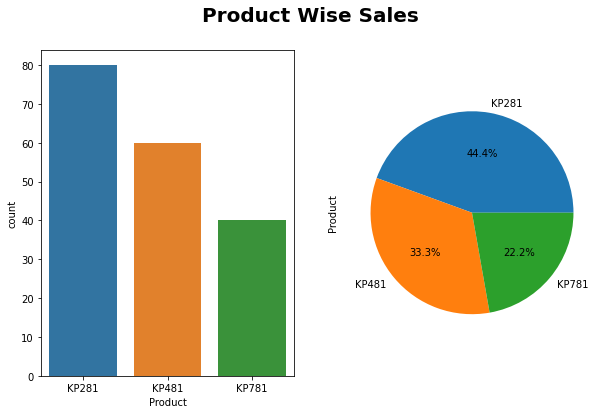

In [23]:
print(df["Product"].value_counts())
categ_univar(df['Product'])

**Observations:**
* The KP281 is most sold model in last 3 months.
* The ranking of order of sales -> KP281 > KP481 > KP781.
* The ratio of product sales is approxmiately 4 : 3 : 2.
* The number of customers prefering KP281 is most twice as the once prefering KP781.
> KP281 is more economical or popular model compared to the other two models


**GENDER-WISE SALES**

Male      104
Female     76
Name: Gender, dtype: int64


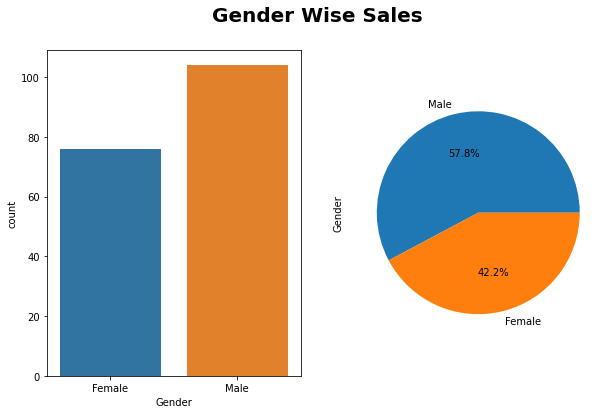

In [24]:
print(df.Gender.value_counts())
categ_univar(df['Gender'])

**Observations:**

* Threadmills are more popular among males compared to females as more threadmill units as purchased by male customers.
* Males to Female customer are in ratio 4 : 3

**MARITAL STATUS - WISE SALES**

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


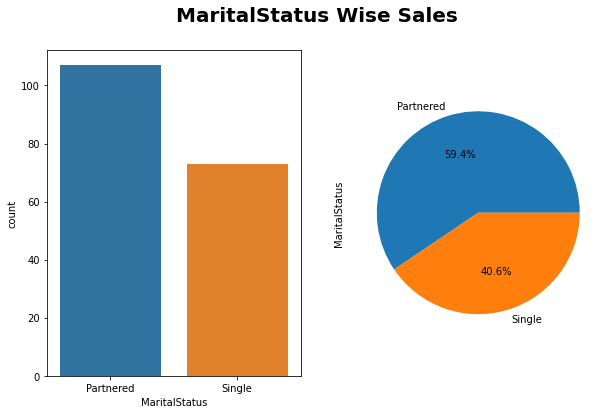

In [25]:
print(df["MaritalStatus"].value_counts())

categ_univar(df['MaritalStatus'])

**Observations:**

* Patnered buyers purchase more threadmill units than Unmarried buyers.

### Bivariate Analysis of Categorical Variables

**PRODUCT SALES VS GENDER**

In [26]:
pd.crosstab(df['Product'], df['Gender'])

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


**Observations:**
* Equal number of customers who purchased KP281 were Male as well as Female.
* Number of customers who purchased KP481 were more Males than Females.
* There are considerably more Males than there are Females who purchased KP781.

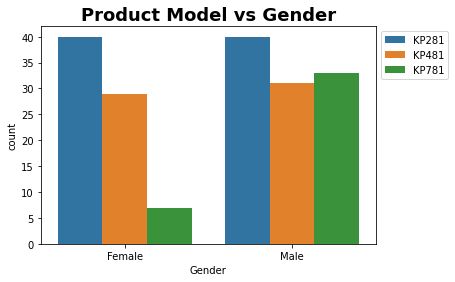

In [27]:
# Count plot  for Product vs Gender
sns.countplot(df.Gender, hue=df.Product)
plt.title('Product Model vs Gender',fontsize=18 ,fontweight='bold')
plt.legend(bbox_to_anchor= (1,1))
plt.show()


**Observations:**

* Threadmills are more popular among males compared to females as more threadmill units as purchased by male customers.

* KP281 is the most popular threadmill model among male and female buyers.
* KP781 is the least popular model of treadmill in female customers.
* KP481 is equally preferred model of treadmill among male and female customers.
* The number of male and female does not varry much between the products.
> Gender is not great predictor for the preference of the customer.

**PRODUCT SALES VS MARITAL STATUS**

In [28]:
pd.crosstab(df['Product'],df['MaritalStatus'] )

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


**Observations:**
* Patnered buyers purchase more threadmill units than Unmarried buyers.

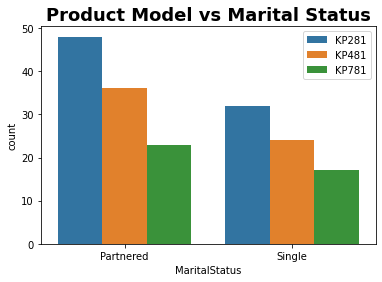

In [29]:
# Countplot for Product vs Marital Status of customers
sns.countplot(df.MaritalStatus, hue=df.Product)
plt.title('Product Model vs Marital Status',fontsize=18 ,fontweight='bold')
plt.legend(bbox_to_anchor= (1,1))
plt.show()

**Observations:**
* Compared to customers who live single , threadmill units gained much popularity among couples as threadmill purchase rate is high among married customers.
* KP281 model is popular among single and partnered buyers.

> **CONTINUOUS VARIABLES - Age, Education, Usage, Fitness, Income, Miles**

### Univariate Analysis for Continuous Variables

**Histogram for Continuous Variables**

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

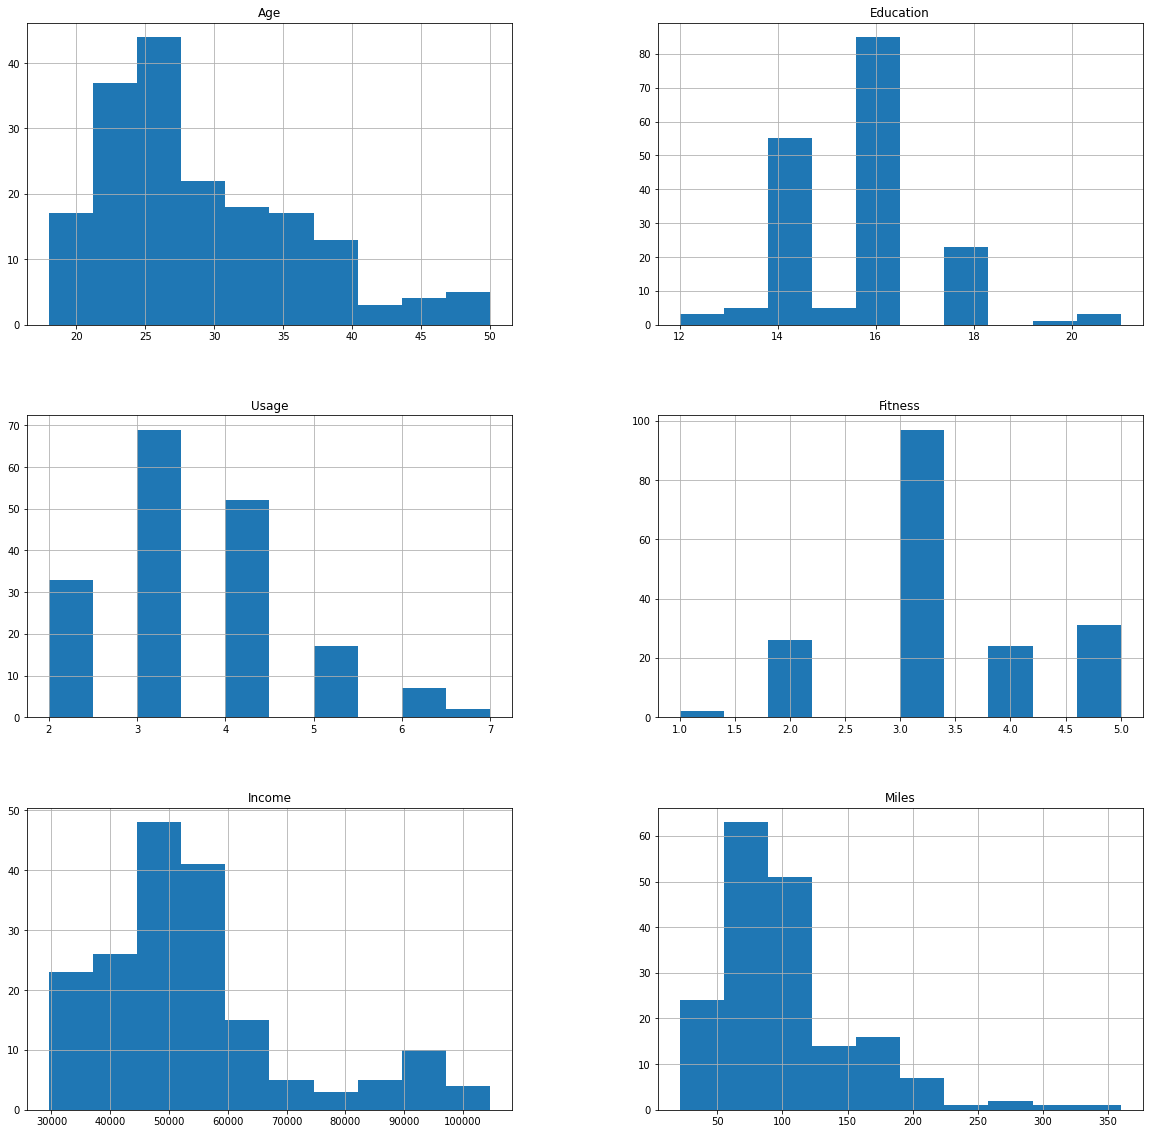

In [30]:
# Histogram of numerical features
df.hist(figsize=(20,20))

In [31]:
def dist_box_violin(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig, axes =plt.subplots(1,3,figsize=(18, 6))
    fig.suptitle("DATA ANALYSIS FOR "+ Name  , fontsize=18, fontweight='bold')
    
    # Distplot
    sns.distplot(data,kde=True,color='Blue',ax=axes[0])
    axes[0].axvline(data.mean(), color='black', linestyle='--',linewidth=2)
    axes[0].axvline(data.median(), color='r', linestyle='dashed', linewidth=2)
    axes[0].axvline(data.mode()[0],color='g',linestyle='solid',linewidth=2)
    axes[0].legend({'Mean':data.mean(),'Median':data.median(),'Mode':data.mode()})
    
    # Boxplot
    sns.boxplot(x=data,showmeans=True, orient='h',color="orange",ax=axes[1])
    
    # Violin plot
    sns.violinplot(data,ax=axes[2],showmeans=True)
    plt.tight_layout()

**BASED ON AGE**

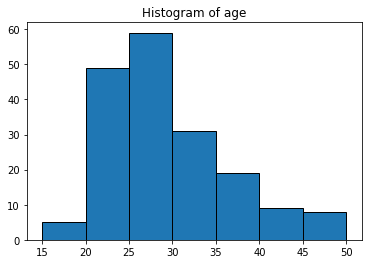

In [32]:
# Histogram of Age
bins = [15,20,25,30,35,40,45,50]
plt.hist(df.Age, bins, edgecolor = 'black')
plt.title('Histogram of age')
plt.show()

**Observations:**
* The number of customers in the age range 22 to 28 is the greatest.
* We have very less customers above age 40 ( Near 10 %)
* The 90 % customers are in the age range 20 to 40.

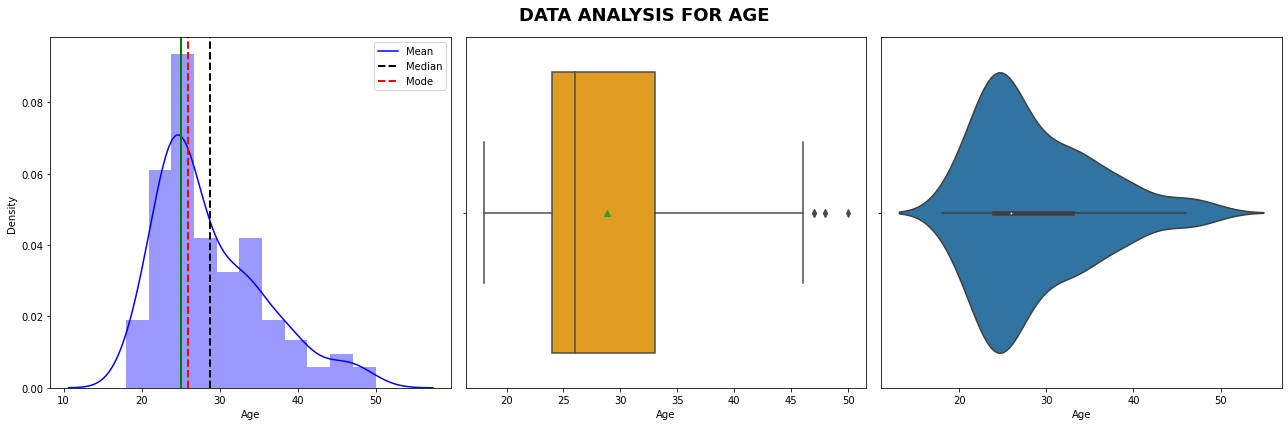

In [33]:
dist_box_violin(df.Age)

**Observations:**
* Age is skewed towards right.
* Customers buying treadmill are younger and average age of customer is 28 , median is 26 and mode is 25
* Customers buying treadmill after age of 40 and before 20 are very less.

**BASED ON EDUCATION**

<AxesSubplot:xlabel='Education', ylabel='count'>

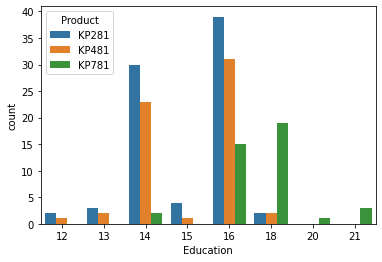

In [34]:
sns.countplot(df.Education, hue = df.Product)

**Observations :**

* Customer with education of 16 years are the greatest buyer of the product.
> Education is not best predictor of customer preference.

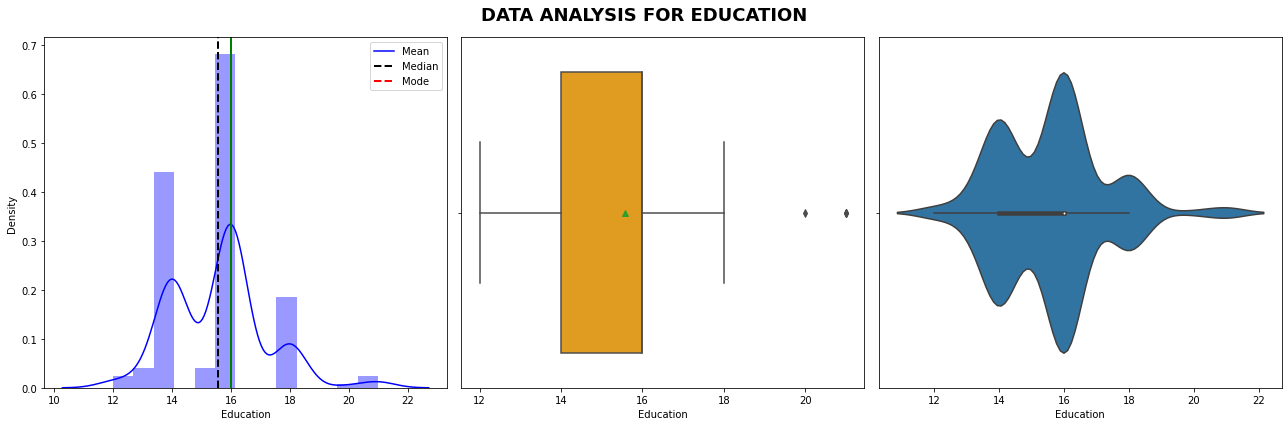

In [35]:
dist_box_violin(df.Education)

**Observations:**

* Most of the customers have 16 year of education (assumed to be college graduates or bachelors).
* There are few outliers.

**BASED ON USAGE**

<AxesSubplot:xlabel='Usage', ylabel='count'>

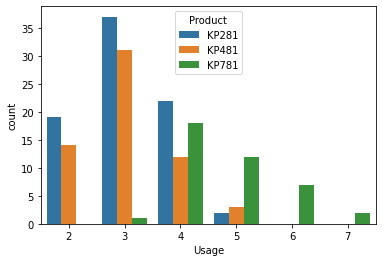

In [36]:
sns.countplot(df.Usage , hue = df.Product )

**Observations :**

* The KP281 used by the customers who are planning to use from 2 to 5 times a week.
* The KP481 used by the customers who are planning to use from 2 to 5 times a week.
* The KP781 used by the customers who are planning to use from 3 to 7 times a week.

> * KP281 and KP481 are preferred by customer who are planning to use moderately.

> * KP781 are prefered by customers who planning a heavy usages.

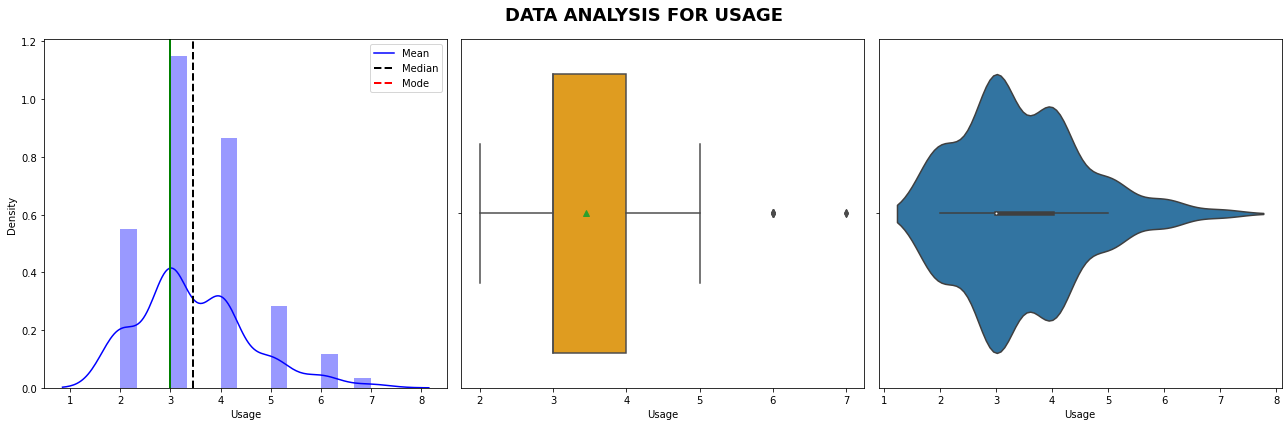

In [37]:
dist_box_violin(df.Usage)

**Observations:**

* Most of customers expect they will be using the treadmill 3-4 days per week.
* There are few outliers where customer are expecting to use treadmill for 6 or 7 times a week

**BASED ON FITNESS**

<AxesSubplot:xlabel='Fitness', ylabel='count'>

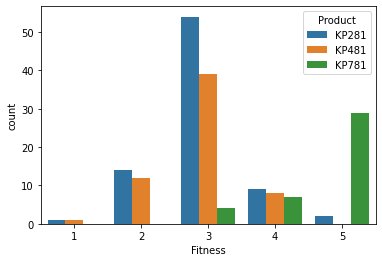

In [38]:
sns.countplot(df.Fitness, hue = df.Product)

**Observation :**

* The KP281 used by customers whose self rated fitness 1 to 5.
* The KP481 used by customers whose self rated fitness 1 to 4.
* The KP781 used by customers whose self rated fitness 3 to 5.
* Many customers have rated themselves with high fitness.

> KP281 and KP481 are bought by customers of varied fitness level.KP781 are who rated themselves with high fitness.

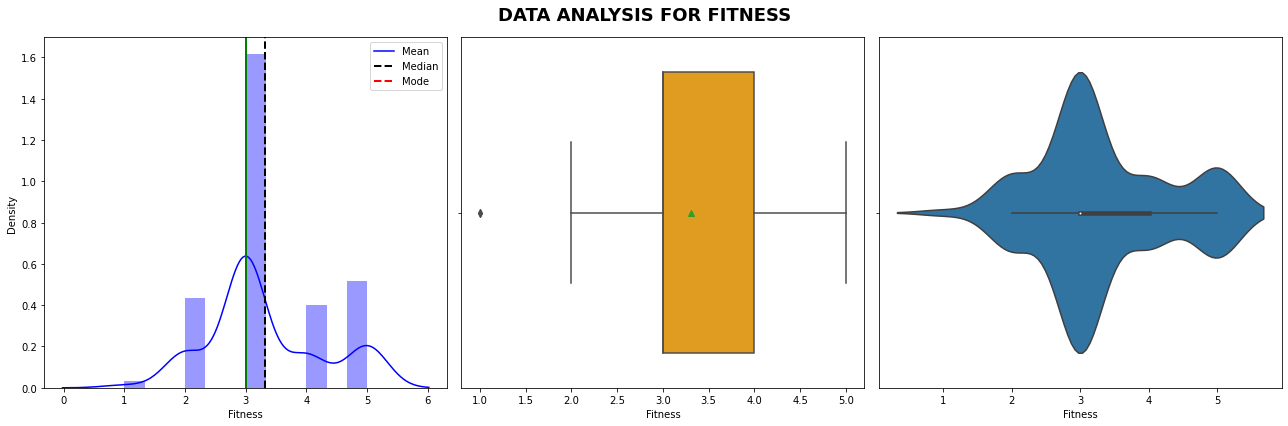

In [39]:
dist_box_violin(df.Fitness)

**Observations:**

* Most of the customers have self-rated their fitness as 3( average).

**BASED ON INCOME**

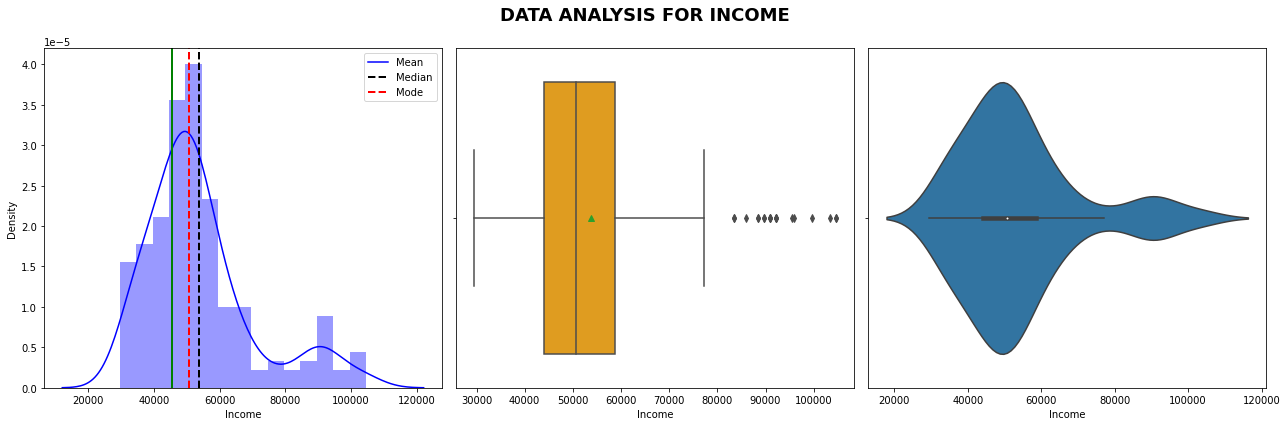

In [40]:
dist_box_violin(df.Income)

**Observations:**
* The income range of the people is showing two peaks and looks like the data is rightskewed indicating outlier on the right.
* Median is 50K , Mean is 55k and mode is $45K.
* Most of the customers are in lower pay range and earn less than 70K.
* Income has some outliers present on the higher value of data. Few customers earn beyond 80K.
* The data is uniformly distributed in the IQR.
> Customers are widely spread in the higher income range.

**BASED ON MILES**

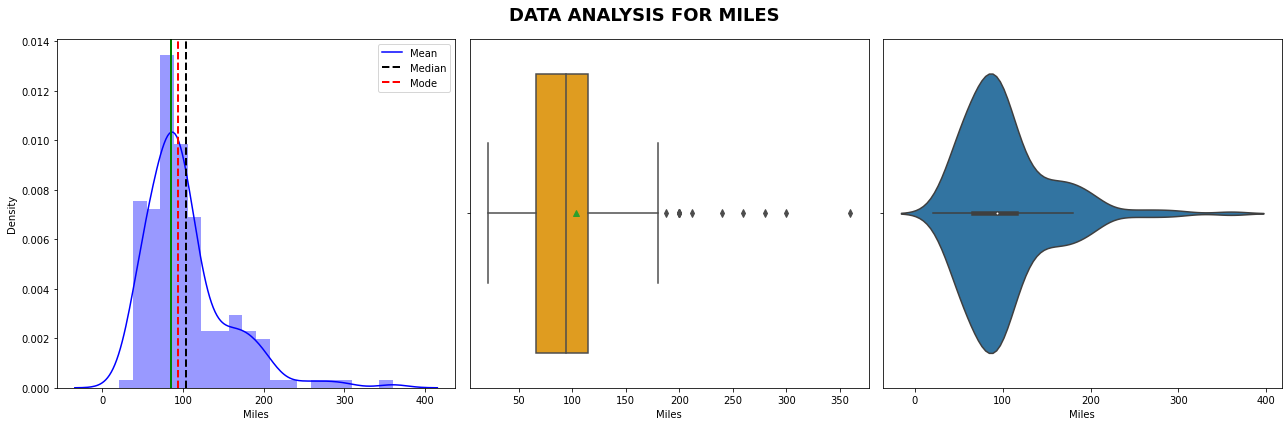

In [41]:
dist_box_violin(df.Miles)

**Observations:**

* Miles is skewed towards right.
* Customers expect to run on an average 80 miles per week.
* There are some outliers present on the higher values of the data, where customers are expecting to run more than 180 miles per week.
* The data is uniformly distributed in IQR.

> Customers are widely spread in the higher miles range.

### Bivariate Analysis for Continuous Variables 

In [42]:
pd.pivot_table(df, index=['Product', 'Gender'],columns=[ 'MaritalStatus'], aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
KP281   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
KP481   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
KP781   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
KP281   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
KP481   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
KP781   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [43]:
df.groupby(by='Product')['Age'].mean() ##Average age of customers buying product models

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

In [44]:
df.groupby('Product')['Income'].mean() ##Average income of customers buying each model

Product
KP281    46418.025
KP481    48973.650
KP781    75441.575
Name: Income, dtype: float64

In [45]:
df.groupby('Product')['Miles'].mean() ##Average miles of customers buying each model

Product
KP281     82.787500
KP481     87.933333
KP781    166.900000
Name: Miles, dtype: float64

In [46]:
df.groupby('Product')['Education'].mean() # Average of number of years of education for each model

Product
KP281    15.037500
KP481    15.116667
KP781    17.325000
Name: Education, dtype: float64

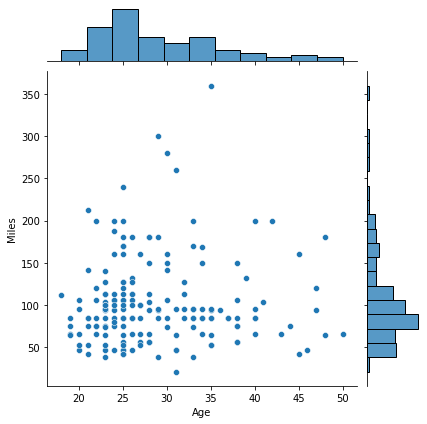

In [47]:
# Analysis of Miles based on Age
sns.jointplot(x = 'Age' , y = 'Miles', data = df)
plt.show()

**Observations:** There is no definite correlation observed between Age and Miles

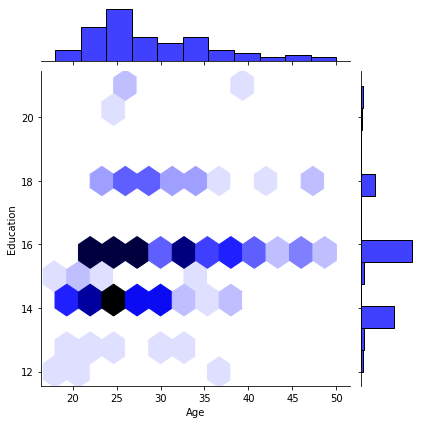

In [48]:
# Analysis Age based on years of Education
sns.jointplot(x = 'Age',y = 'Education',data = df,color="Blue",kind='hex')

**Observations:** Customer between age 20-40 have 14 -16 years of education

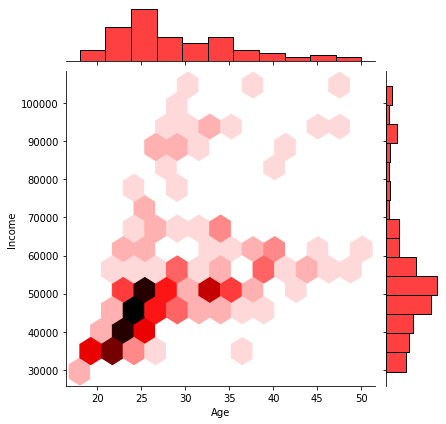

In [49]:
# Analysis of Income based on Age
sns.jointplot(x = 'Age' , y = 'Income', data = df, color='red', kind ='hex')
plt.show()

**Observations:** Income increases with the age, depicting positive correlation.

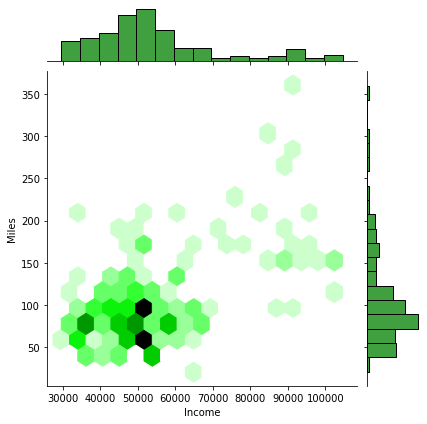

In [50]:
# Analysis of Miles based on Income
sns.jointplot(x = 'Income' , y = 'Miles', data = df, color='green', kind ='hex')
plt.show()

**Observations:** A slight positive correlation can be observed between income and miles. This is may be due to the fact that the high income people are buying KP781 model which has higher range of miles.

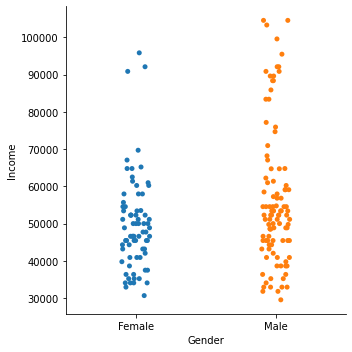

In [51]:
# Analysis of Income based on Gender
sns.catplot(x = 'Gender' , y = 'Income', data = df)
plt.show()

**Observations:** Male Customers have higher income range, when compared to Female Customers

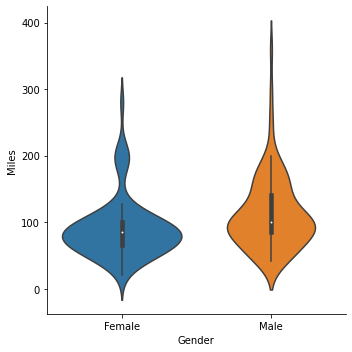

In [52]:
# Analysis of Miles based on Gender
sns.catplot(x = 'Gender' , y = 'Miles', data = df, kind = 'violin')
plt.show()

**Observations:** Male Customers plan to run more miles, when compared to Female Customers.

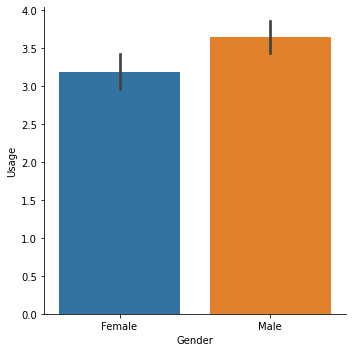

In [53]:
# Analysis of Usage based on Gender
sns.catplot(x = 'Gender' , y = 'Usage', data = df, kind = 'bar')
plt.show()

**Observations:** Male Customers show higher usage per week, when compared to Female Customers

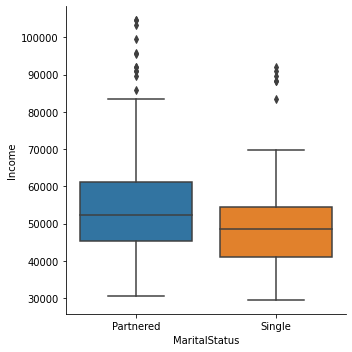

In [54]:
# Analysis of Income based on Marital Status
sns.catplot(x = 'MaritalStatus' , y = 'Income', data = df, kind = 'box')
plt.show()

**Observations:** Partnered Customers have higher income range, when compared to Single Customers

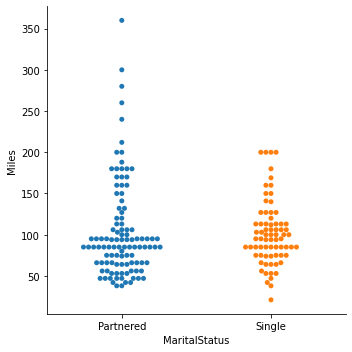

In [55]:
# Analysis of Miles based on Marital Status
sns.catplot(x = 'MaritalStatus' , y = 'Miles', data = df , kind = 'swarm')
plt.show()

**Observations:** Partnered Customers plan to run more miles, when compared to Single Customers

**PRODUCT  V/S  AGE,INCOME,EDUCATION,USAGE,FITNESS,MILES**

<Figure size 504x504 with 0 Axes>

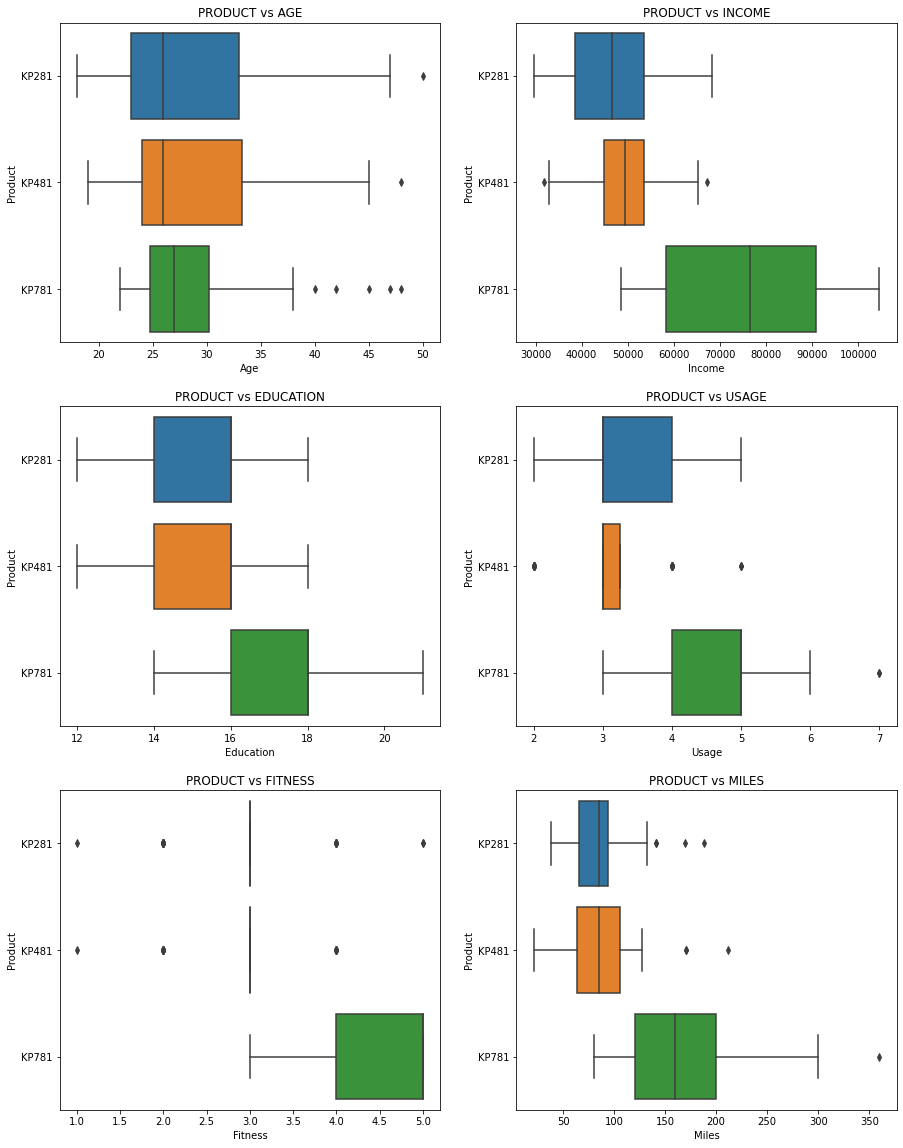

In [56]:
# Boxplot
plt.figure(figsize=(7,7))
fig1, axes1 =plt.subplots(3,2,figsize=(15, 20))
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
#instead of writing  boxplot 6 times using for loop
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    
    sns.boxplot(df[list1_col[i]],df['Product'],ax=ax).set(title='PRODUCT vs ' + list1_col[i].upper())

**Observations:**

* There are many outliers for KP781 ,customers are more than age of 40 .
* Age of customers buying KP281 and KP481 is between 20-35, where as customers buying KP781 are primarily in 25-30.
* Customers with higher income and more education have purchased KP781 model.
* Customers with lower income purchase KP281 and KP481 model may be because of cost of the treadmill.
* Customer with KP281 expect to use treadmill 3-4 times a week and have average self rated fitness as 3 and some unfits.
* Customers who bought KP481 model expecting to use treadmill less frequently but to run more miles a week.
* Customer buying KP781 plan to use it more frequently , run more miles and have high self rated fitness .They seem to be more health conscious or professionals.
* KP781 model was purchased more by males customer than female customers .
* More partnered customer tend to buy KP781 than single customers.

**GENDER  V/S  AGE,INCOME,EDUCATION,USAGE,FITNESS,MILES**

<Figure size 504x504 with 0 Axes>

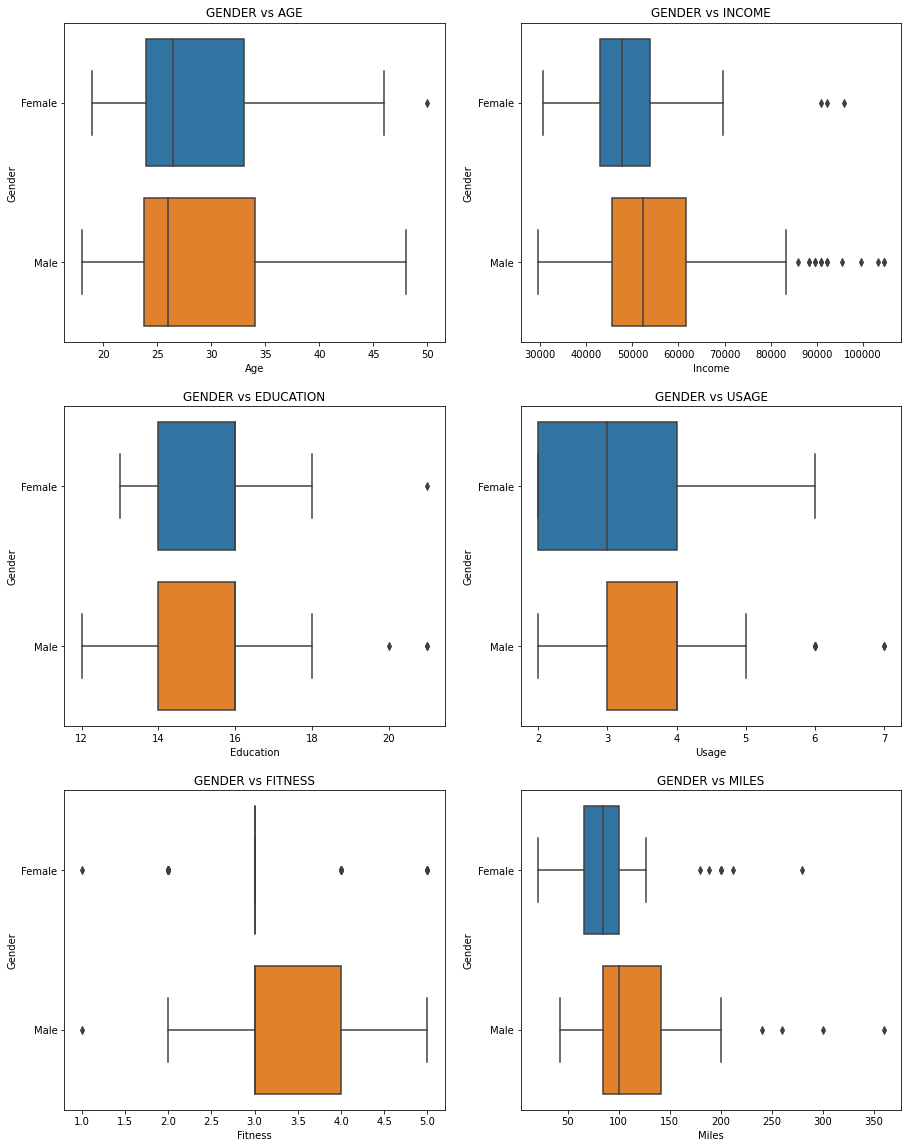

In [57]:
# Boxplot
plt.figure(figsize=(7,7))
fig1, axes1 =plt.subplots(3,2,figsize=(15, 20))
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
# to plot graph side by side.
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(df[list1_col[i]],df['Gender'],ax=ax).set(title='GENDER vs ' + list1_col[i].upper())

**Observations:**

* Male customers earn more than female customers.
* Males customers have higher self rated fitness than females.
* Expected usage and miles covered on tread mill is less in female customers than male customers.
* Female in age range 23-33 purchased the treadmill.
* Education of male and female customers is same.

**MARITAL STATUS  V/S  AGE,INCOME,EDUCATION,USAGE,FITNESS,MILES**

<Figure size 504x504 with 0 Axes>

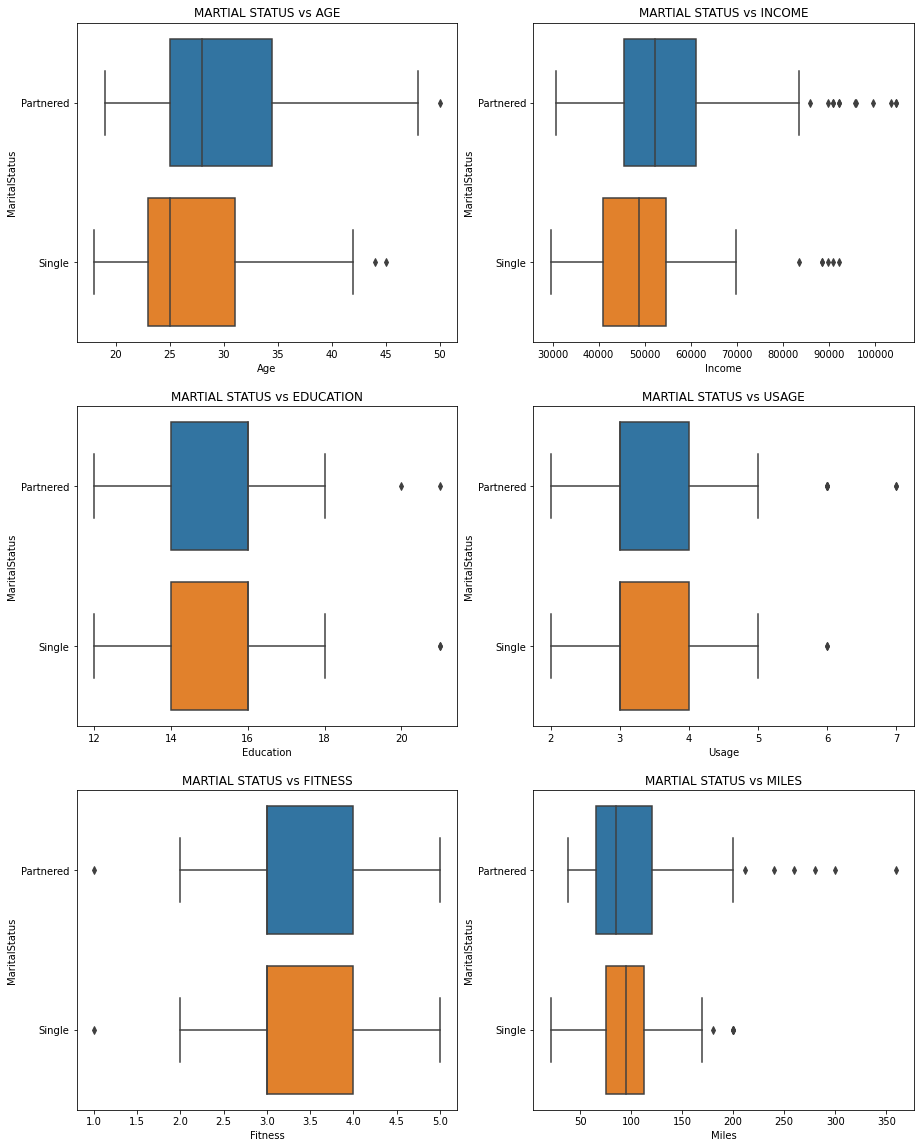

In [58]:
# Boxplot
plt.figure(figsize=(7,7))
fig1, axes1 =plt.subplots(3,2,figsize=(15, 20))
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(df[list1_col[i]],df['MaritalStatus'],ax=ax).set(title='MARTIAL STATUS vs ' + list1_col[i].upper()) 

**Observations:**

* Partnered customer expects to run more miles compared to single
* Income of Partnered customer is more than income of single customer.
* Age of Partnered customer is more than Age of single customer
* There are more single males buying Treadmill than single Females
* Self rated Fitness of both Partnered and Single customer are same.
* Education of both Partnered and Single customer is same

[Text(0.5, 1.0, 'EDUCATION  BY INCOME ')]

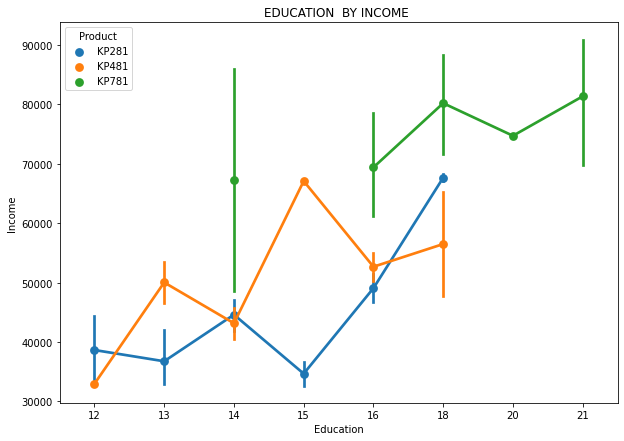

In [59]:
plt.figure(figsize=(10,7))
sns.pointplot(x=df["Education"],y=df["Income"],hue=df['Product']).set(title='EDUCATION  BY INCOME ')


**Observations:**

* Education and Income are correlated.
* KP781 has higher income and higher education rate.
* Customers with higher education has higher income range

**Pairplot of all numerical values with classification of Product**

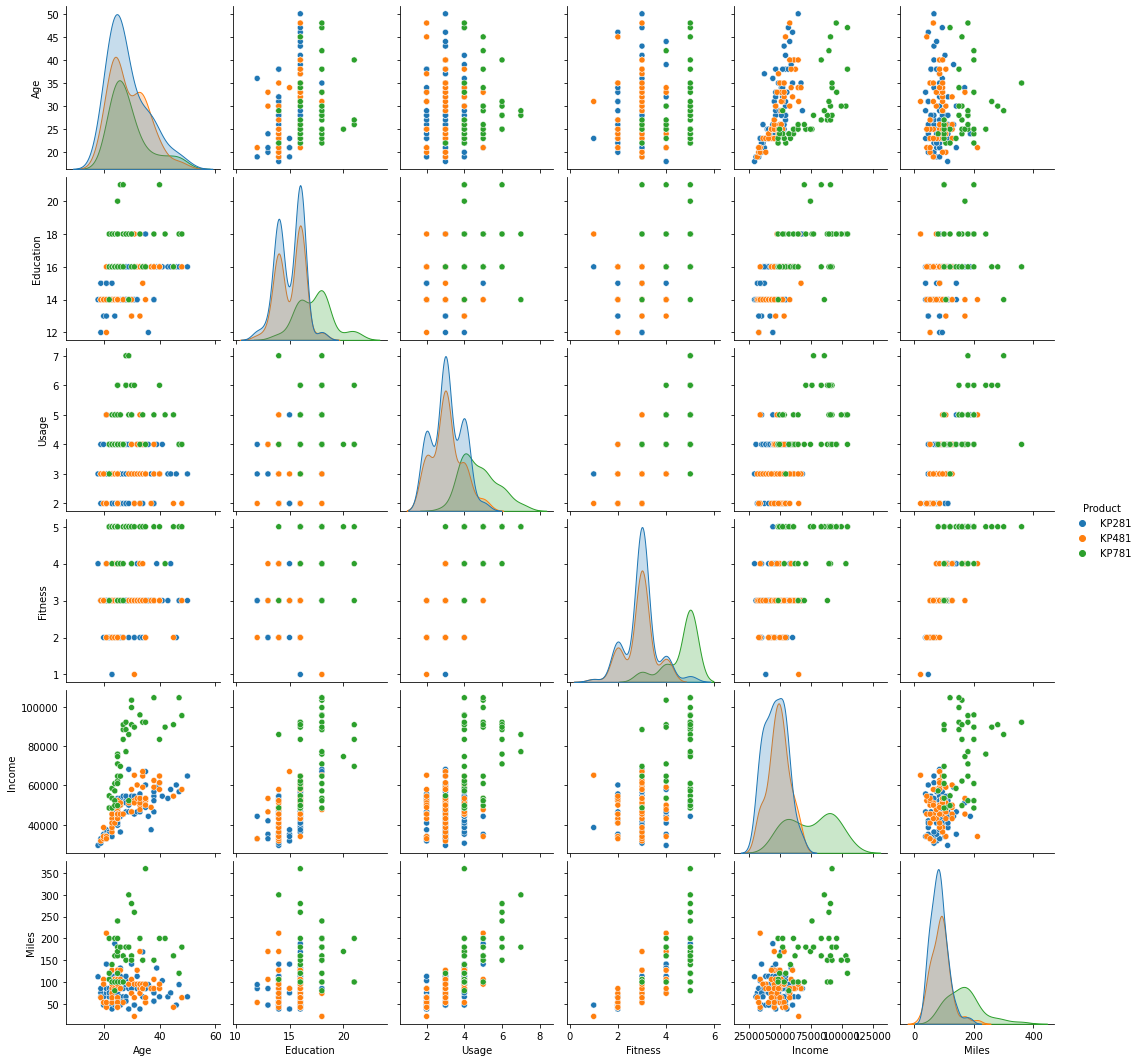

In [60]:
sns.pairplot(df, hue='Product')
plt.show()

**Overview of the correlation between different Continuous Variables**

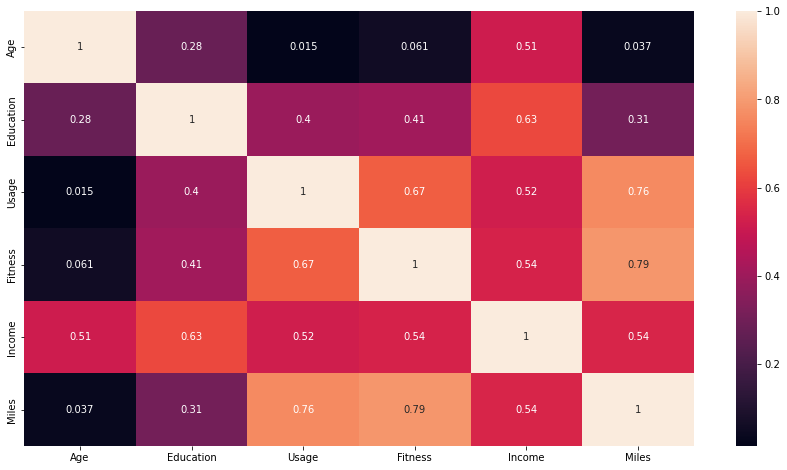

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [61]:
# Correlation of numerical values in dataset
corr = df.corr()

# Heatmap for the correlation of numerical values in dataset
plt.figure(figsize=(15,8))
plt.show(sns.heatmap(corr, annot=True))
print()
corr

**Observations:**

* Miles and Usage show high correlation
* Fitness and Miles show high correlation
* Education and Income show notable correlation
* Usage and Fitness show notable correlation
* Income and Usage show little correlation
* Age,Education,Usage,Fitness & Miles has significant correlation with Income and vice versa.
* Usage and Fitness are highly correlated with Miles and vice versa.

In [62]:
corr_pairs = df.corr().unstack() # give pairs of correlation
print( corr_pairs[abs(corr_pairs)>0.5]) # Gives us correlated data

Age        Age          1.000000
           Income       0.513414
Education  Education    1.000000
           Income       0.625827
Usage      Usage        1.000000
           Fitness      0.668606
           Income       0.519537
           Miles        0.759130
Fitness    Usage        0.668606
           Fitness      1.000000
           Income       0.535005
           Miles        0.785702
Income     Age          0.513414
           Education    0.625827
           Usage        0.519537
           Fitness      0.535005
           Income       1.000000
           Miles        0.543473
Miles      Usage        0.759130
           Fitness      0.785702
           Income       0.543473
           Miles        1.000000
dtype: float64


**Observations:**

* Age and Income has some in significant correlation
* Education and Income has very little correlation
* There is some corelation between Usage and Income
* Fitness and miles are corelated
* KP781 model is correlated to Education, Usage, Fitness, Income and Miles.
* Miles and usage are positively correlated

### Multivariate Analysis

MaritalStatus Partnered      Single     
Gender           Female Male Female Male
Product                                 
KP281                27   21     13   19
KP481                15   21     14   10
KP781                 4   19      3   14


<AxesSubplot:xlabel='Product'>

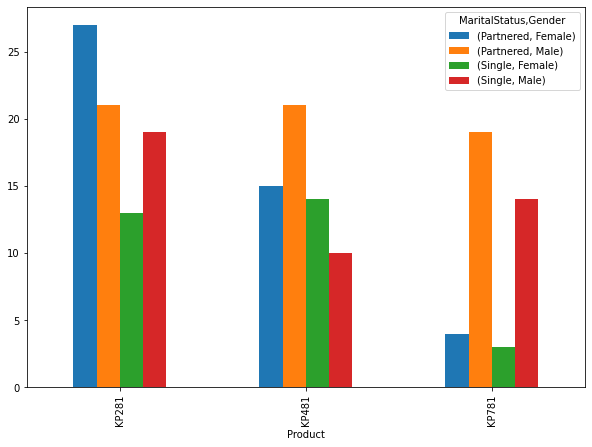

In [63]:
prd_mar_gen= pd.crosstab(index=df["Product"],columns=[df["MaritalStatus"],df["Gender"]])  
print(prd_mar_gen)
prd_mar_gen.plot(kind='bar',figsize=(10,7))

**Observations:**

* Partnered Female bought KP281 Model compared to Partnered male.
* Single Female customers bought KP481 model more than Single male customers.
* Partnered Male customers bought KP781 model more than Single Male customers.
* There are more single males buying Treadmill than single Females.
* Single Male customers bought KP281 Model compared to Single Female.
* Majority of people who buy the KP781 are man & partnered.
* The majority of threadmill customers are males.

In [64]:
prod_gen_fit=pd.crosstab(index=df['Product'],columns=[df['Gender'],df['Fitness']])
prod_gen_fit.T

Product         KP281  KP481  KP781
Gender Fitness                     
Female 1            0      1      0
       2           10      6      0
       3           26     18      1
       4            3      4      1
       5            1      0      5
Male   1            1      0      0
       2            4      6      0
       3           28     21      3
       4            6      4      6
       5            1      0     24

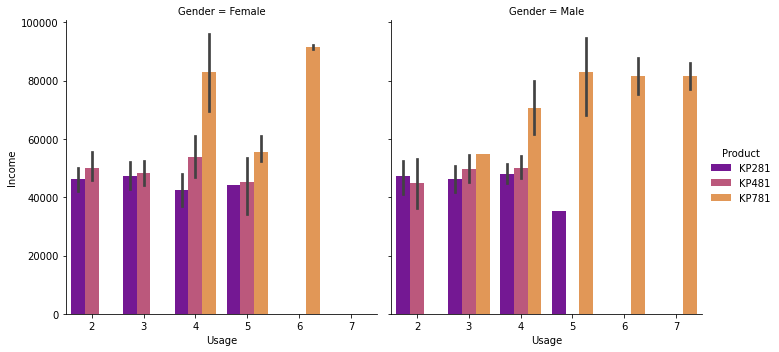

In [65]:
sns.catplot(x='Usage', y='Income', col='Gender',hue='Product' ,kind="bar", data=df,palette="plasma")

**Observations:**
* Customers having lower income range (<60K) prefer to buy models KP281 & KP481 and expect to use treadmill 2-5 times/week.
* Mostly higher earning customers bought KP781 and expect to use treadmill 4-6 times/week.

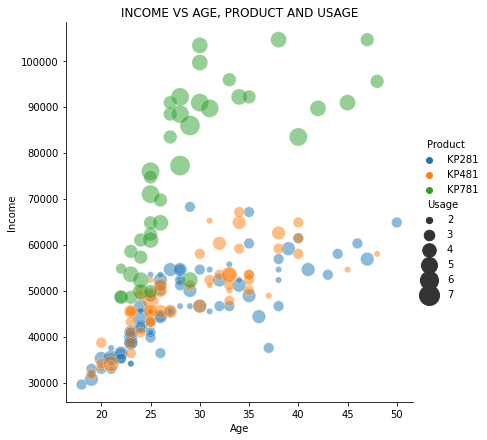

In [66]:
#scatter plot between income, age ,product and usage
sns.relplot(x="Age", y="Income", hue="Product", size="Usage",sizes=(40, 400), alpha=.5,
            height=6, data=df).set(title='INCOME VS AGE, PRODUCT AND USAGE')
plt.show()

**Observations:**

* Customers having lower income range (<60K) prefer to buy models KP281 & KP481 and fall to age category (20-35).
* Mostly higher earning customers bought KP781 belongs to (20 to 30) age group.

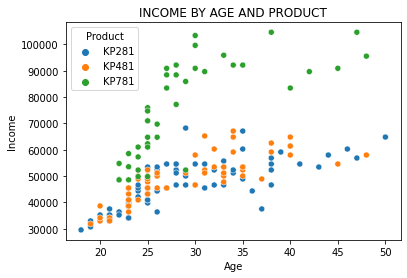

In [67]:
# How do income and age affect the decision of which model is bought?
sns.scatterplot(x='Age', y='Income',data=df, hue = 'Product').set(title='INCOME BY AGE AND PRODUCT')
plt.show()

**Observations:**

* Products KP281 and KP481 are bought by people having age concentrated more in range of 23-35.
* Product KP781 is mainly bought by people that falls in age range of 23-30. 


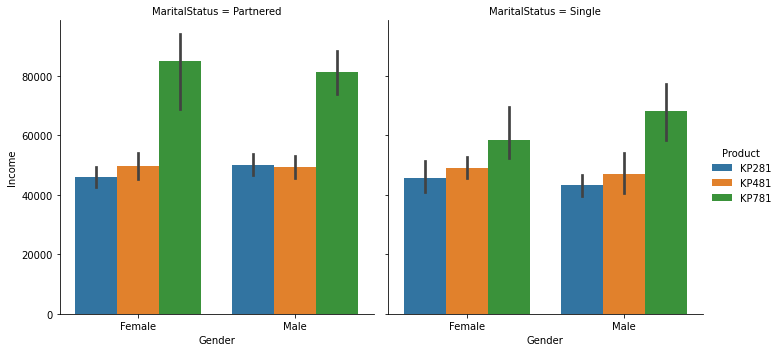

In [68]:
# Income by gender by product and by marital status
sns.catplot(x='Gender',y='Income', hue='Product', col='MaritalStatus', data=df,kind='bar')

**Observations:**

* KP781 leads all charts across customer segments.
* Single Female Customers have purchased more of KP281 and KP481 models compared to Single Male Customers
* Single Male Customers are more than Single Female Customers
* Partnered Female Customers are more than Partnered Male Customers

# BUSINESS INSIGHTS

* KP281 model is the most purchased model (44.4%) then KP481 (33.3%). KP781 is the least sold model (22.2%) which suggests KP281 is more economical or popular model compared to the other two models.

* 57.78% of customers are males, which is more than the female customers(42.2%).KP281 is the most popular threadmill model among male and female buyers.

* Compared to customers who live single , threadmill units gained much popularity among couples(59.4%).KP281 model is popular among single and partnered buyers over KP481 and KP781 models.

* Customers buying treadmill are younger with average age as 28, median as 26 and mode as 25.Age of customers buying KP281 and KP481 is between 20-35, where as customers buying KP781 are primarily in 25-30.Customers buying treadmill after age of 40 and before 20 are very less.

* Customers having lower income range (<70K) prefer to buy models KP281 & KP481 models.KP781 is mostly preferred by customers with higher income range.

* Expected usage and miles covered on tread mill is less in female customers than male customers.Male Customers show higher usage per week, when compared to female customers.

* Average Education (in years) of customers is 16 and median is 18.Most of the customers have 16 year of education (assumed to be college graduates or bachelors) and they are the greatest buyer of the product.Education is not best predictor of customer preference.

## CUSTOMER PROFILE BASED ON PRODUCT MODELS.

**KP281**

* 44.4% customers brought KP281, making it most popular model.Most popular model (in all genders) because of its appealing price and affordability with 44.4% of sales.

* This model has same level of popularity in male customers as well as female customers as almost equal number of males and females bought this model which suggests that this model is not gender specfic.

* Majority of the customers who purchased this model are Partnered females and Single males compared to Single females and Partnered males. This may be cause of the features this treadmill provides and the cost of treadmill.

* Average age of customer who purchases KP281 is 28.5 and median is 26.This model is popular among Bachelors as average years of education of customers for this product is 15.

* Majority of the customers who bought this treadmill have income less than 60k with an average of 55K, assuming it’s because of its appealing price and affordability.

* Customers who bought this treadmill believe their fitness is average and they expect to use treadmill 3-4 times a week.Possible reason for this might be people are looking for a basic treadmill that does the job. 



**KP481**

* This model is second most sold model with 33.3% of sales.

* Average age of customer who purchases KP481 is 29 yearS, Median is 26 . Majority of buyers are in 24-33 age group.

* This model is popular among Bachelors as average years of education of customers for this product is 16.

* This model is popular more in single female customers compare to single male customers may be because of difference in provided features or color scheme.

* Customers with lower income purchase KP281 and KP481 models may be because of lower cost of the Treadmill.

* Customers expecting KP481 model to use less frequently but to run more miles per week on this.

**KP781**

* This is the least sold product (22.2% sales), may be because it have a heafty price range making it Company's Premium product.

* KP781 is the most popular model of treadmill in male customers ,especially patnered males compared to females which suggests people who are more serious about fitness or professionals buy this model.

* Average age of customer who purchases KP781 is 29 , Median is 27 . There are some outliers , suggesting we need explore more closely customers who are above 40 for any possibility of new customers.

* This model is popular among customers with higher education as average education is 17 years.

* This model is popular with customers having high income range as average income is 75K.Treadmill may have some advanced features and costlier compared to other two models and hence people with high income are ready to spend more money to buy this model.

* The expected usage of KP781 by customers is 4-5 days/week with moderate Miles to run having average 166 miles per week self rated fitness is between 3 -5, indicates that they have been working out or might be looking for an upgrade from there existing treadmill model. 

# RECOMMENDATIONS

* KP281 and KP481 are more popular with customers who belongs to average income category, may be because of their cost.These threadmill models can be promoted as basic budget models for lower income groups and to naive users for improving fitness with decent model features.KP781 should be branded as Premium treadmill model and marketed among high income groups and specific customer categories (athletes,professionals etc.).


* We can also attract customers by organising promotional programs for upgrading from their existing treadmill model to premium model, highlighting extra features that KP781 provides.Attractive discounts/rewards can also be offered to existing customers for upgradation and for all successful recommendations to others.


* Threadmill products are less popular among female buyers compared to males.Special promotions and marketing campaigns can be organised to target female customers on Women's Day and similar celebrated ocassions like Mother's day emphasizing on the relevance of fitness and exercise in day-to-day life. Such programmes can also be showcased as a remedy for female-related health problems or postpartum issues to target middle-aged female customers. We can also endorse some lady sports professionals/athlete/ to promote treadmill units and thereby increase the sales.


* As per market research,majority of customers are younsters with higher educational qualifications.We need to check the feasibility of attracting customers within and outside the age range of 18-30 and increasing sales by creating fitness-related workshops, awareness campaigns in shopping centres,transport hubs and other crowded areas.


* Discount sales/ rewards programs can be launched to promote per week of usage.Fitness challenge programmes can also be introduced among users.More interactive user-guide options and excellent customer service ratings could also be a way to beat the competators in this field.

  

#### **By Mrudula A P**